## Import Libraries

In [1]:
from googleapiclient.discovery import build 
import pandas as pd
from matplotlib import pyplot as plt

## Get api key,channel Id and service

In [2]:
api_key='ADIzaSyCZHdjHVsbHHw6Ln4osZDW0qqPX0tYyI8SM'
channel_ids=['UCnz-ZXXER4jOvuED5trXfEA',  
            'UCyHta2dyCTkf29AB67AYn7A',  
            'UCJihyK0A38SZ6SdJirEdIOw',  
            'UCM-yUTYGmrNvKOCcAl21g3w',  
            'UCQYMhOMi_Cdj1CEAU-fv80A'  
            ]
youtube=build('youtube','v3',developerKey=api_key) 

## 1. Extract details of some Youtube Channels

### Function to get Channel Statistics

In [3]:
def get_channel_stats(youtube,channel_ids):
    all_data=[]
    request=youtube.channels().list(
        part='snippet,contentDetails,statistics',
        id=','.join(channel_ids))
    response=request.execute() 
    for i in range(len(response['items'])):
        data=dict(Channel_name=response['items'][i]['snippet']['title'],
                  Subscribers=response['items'][i]['statistics']['subscriberCount'],
                  Views=response['items'][i]['statistics']['viewCount'],
                  Total_videos=response['items'][i]['statistics']['videoCount'],
                 Playlist_id=response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)
    return all_data

In [4]:
channel_statistics=get_channel_stats(youtube,channel_ids)

### DataFrame

In [5]:
channel_data=pd.DataFrame(channel_statistics)

In [6]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,Playlist_id
0,Neso Academy,2240000,475757685,2542,UUQYMhOMi_Cdj1CEAU-fv80A
1,Jenny's Lectures CS IT,1390000,154130436,673,UUM-yUTYGmrNvKOCcAl21g3w
2,Gate Smashers,1570000,344645682,1369,UUJihyK0A38SZ6SdJirEdIOw
3,techTFQ,237000,12119344,97,UUnz-ZXXER4jOvuED5trXfEA
4,5 Minutes Engineering,516000,82356969,1761,UUyHta2dyCTkf29AB67AYn7A


### Convert some columns to numeric

In [7]:
channel_data['Subscribers']=pd.to_numeric(channel_data['Subscribers'])
channel_data['Views']=pd.to_numeric(channel_data['Views'])
channel_data['Total_videos']=pd.to_numeric(channel_data['Total_videos'])
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
Playlist_id     object
dtype: object

### Plots

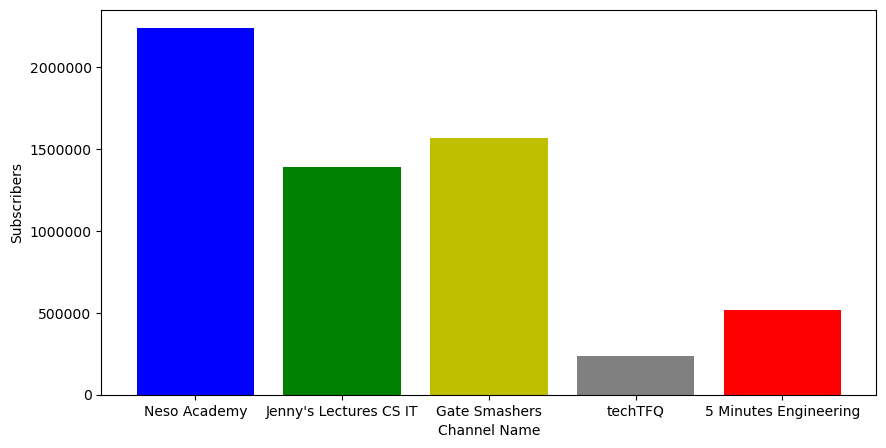

In [8]:
plt.figure(figsize=(10,5))
plt.bar(channel_data['Channel_name'],channel_data['Subscribers'],color=['b','g','y','grey','r'])
plt.xlabel('Channel Name')
plt.ylabel('Subscribers')
plt.ticklabel_format(style='plain',axis='y') 
plt.show()

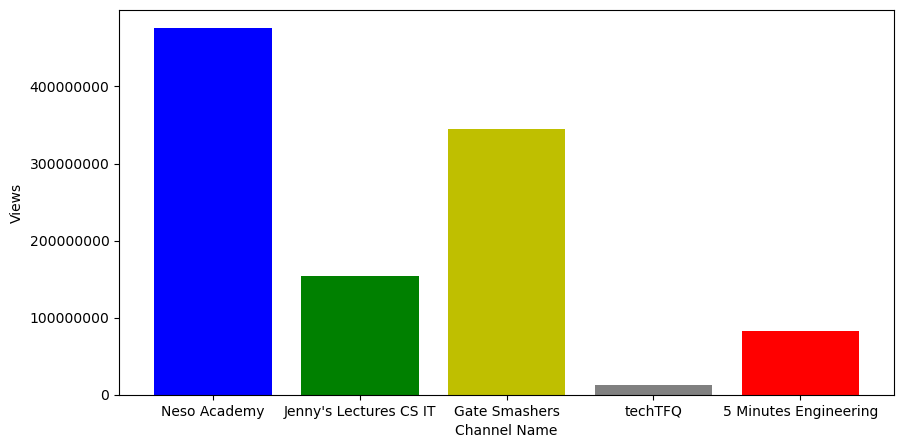

In [9]:
plt.figure(figsize=(10,5))
plt.bar(channel_data['Channel_name'],channel_data['Views'],color=['b','g','y','grey','r'])
plt.xlabel('Channel Name')
plt.ylabel('Views')
plt.ticklabel_format(style='plain',axis='y') 
plt.show()

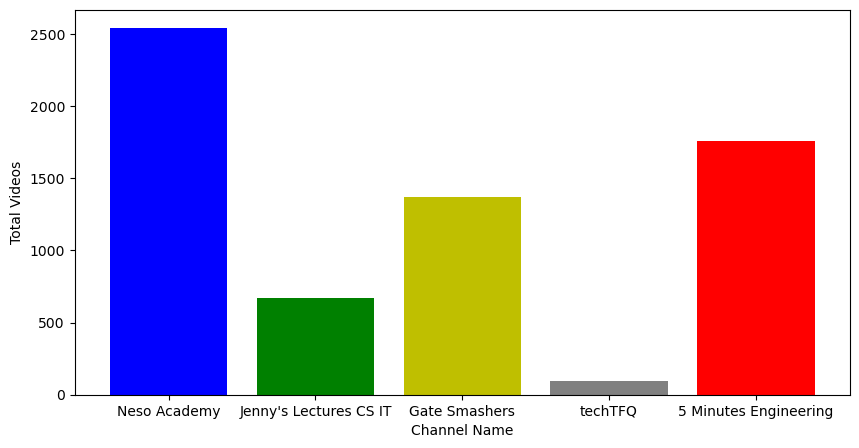

In [10]:
plt.figure(figsize=(10,5))
bars=plt.bar(channel_data['Channel_name'],channel_data['Total_videos'],color=['b','g','y','grey','r'])
plt.xlabel('Channel Name')
plt.ylabel('Total Videos')
plt.ticklabel_format(style='plain',axis='y')
plt.show()

### Function to get video ids

In [11]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,Playlist_id
0,Neso Academy,2240000,475757685,2542,UUQYMhOMi_Cdj1CEAU-fv80A
1,Jenny's Lectures CS IT,1390000,154130436,673,UUM-yUTYGmrNvKOCcAl21g3w
2,Gate Smashers,1570000,344645682,1369,UUJihyK0A38SZ6SdJirEdIOw
3,techTFQ,237000,12119344,97,UUnz-ZXXER4jOvuED5trXfEA
4,5 Minutes Engineering,516000,82356969,1761,UUyHta2dyCTkf29AB67AYn7A


In [12]:
Playlist_id=channel_data.loc[channel_data['Channel_name']=='Neso Academy','Playlist_id'].iloc[0]

In [13]:
Playlist_id

'UUQYMhOMi_Cdj1CEAU-fv80A'

In [14]:
def get_video_ids(youtube,Playlist_id):
    request=youtube.playlistItems().list(
        part='contentDetails',
        playlistId=Playlist_id,
        maxResults=50)    
    response=request.execute()
    video_ids=[]
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
    next_page_token=response.get('nextPageToken') 
    more_pages=True
    while more_pages:
        if next_page_token is None:
            more_pages=False
        else:
            request=youtube.playlistItems().list(
                part='contentDetails',
                playlistId=Playlist_id,
                maxResults=50,
                pageToken=next_page_token)   
            response=request.execute()  
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            next_page_token=response.get('nextPageToken')
    return video_ids

In [15]:
video_ids=get_video_ids(youtube,Playlist_id)

## 2. Extract in dept details of the top Youtube Channel among these channels

### Function to get Video Details

In [16]:
def get_video_details(youtube,video_ids):
    all_video_stats=[]
    for i in range(0,len(video_ids),50):
        request=youtube.videos().list(
            part='snippet,statistics',
            id=','.join(video_ids[i:i+50]))
        response=request.execute()
        for video in response['items']:
            video_stats=dict(Title=video['snippet']['title'],
                            Published_date=video['snippet']['publishedAt'],
                            Views=video['statistics']['viewCount'],
                            Likes=video['statistics']['likeCount'],
                            Comments=video['statistics']['commentCount'])
            all_video_stats.append(video_stats)
    return all_video_stats

In [17]:
video_details=get_video_details(youtube,video_ids)

### DataFrame

In [18]:
video_data=pd.DataFrame(video_details)

### Convert some columns to numeric

In [19]:
video_data['Published_date']=pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views']=pd.to_numeric(video_data['Views'])
video_data['Likes']=pd.to_numeric(video_data['Likes'])
video_data['Comments']=pd.to_numeric(video_data['Comments'])
video_data

,Title,Published_date,Views,Likes,Comments
0,Conditionals and Loops - Program 1,2023-09-18,5974,79,6
1,Counter Mode (CTR),2023-09-16,4015,51,1
2,Output Feedback (OFB),2023-09-14,3264,47,2
3,The Basics of while Loop in Python,2023-09-13,5350,80,10
4,Semantic Analysis | Chapter-5 | Compiler Desig...,2023-09-12,2473,28,1
...,...,...,...,...,...
2523,Karnaugh Map (K' Map) - Part 1,2014-09-02,1788338,22477,970
2524,Gray Code to Binary & Binary to Gray Code conv...,2014-08-29,148044,853,82
2525,Excess 3 Code (XS 3 Code) Old,2014-08-29,68710,268,13
2526,Binary Coded Decimal (BCD Code),2014-08-29,247885,1215,62


### Top 10 videos

In [20]:
top10_videos=video_data.sort_values(by='Views',ascending=False).head(10)

In [21]:
top10_videos

,Title,Published_date,Views,Likes,Comments
2409,What is Signal?,2015-03-29,3726659,17690,601
2385,SR Latch | NOR and NAND SR Latch,2015-04-20,3322316,36593,1770
2455,Introduction to SR Flip Flop,2015-02-09,2882704,19764,443
2069,Introduction to Theory of Computation,2016-12-15,2760759,18005,509
1892,Introduction to Operating Systems,2017-08-02,2386151,28853,630
2481,Introduction to Multiplexers | MUX Basic,2014-12-06,2370683,20969,482
2451,Introduction to JK flip flop,2015-02-18,2319513,17776,435
2459,Introduction to Sequential Circuits | Important,2015-02-01,2294465,19342,356
2466,Introduction to Encoders and Decoders,2015-01-23,2073510,16182,259
2501,Full Adder,2014-10-20,1959699,16981,383


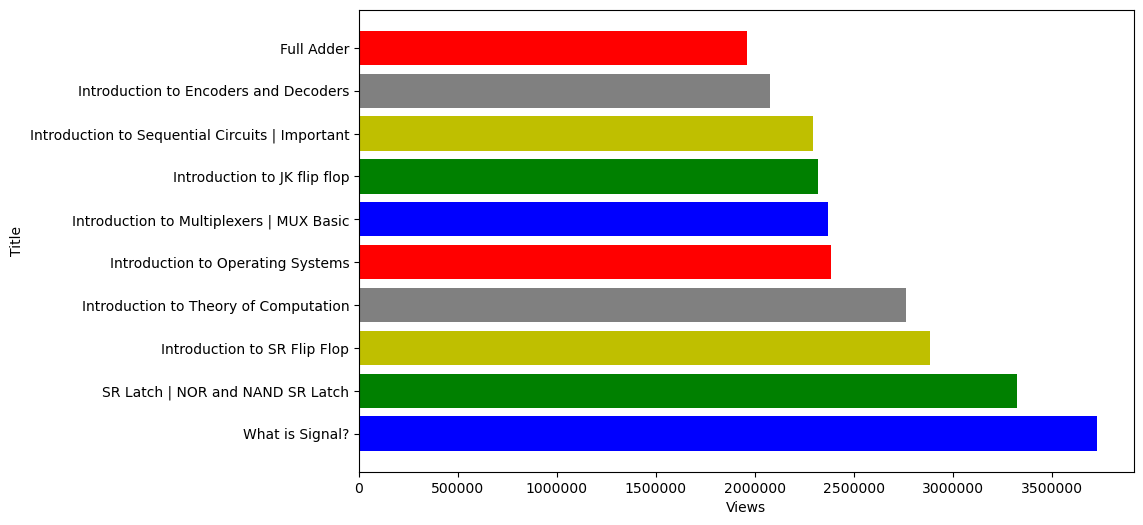

In [36]:
plt.figure(figsize=(10,6))
plt.barh(top10_videos['Title'],top10_videos['Views'],color=['b','g','y','grey','r'])
plt.xlabel('Views')
plt.ylabel('Title')
plt.ticklabel_format(style='plain',axis='x')
plt.show()

### Videos per Month

In [23]:
video_data['Month']=pd.to_datetime(video_data['Published_date']).dt.strftime('%b')

In [24]:
video_data

,Title,Published_date,Views,Likes,Comments,Month
0,Conditionals and Loops - Program 1,2023-09-18,5974,79,6,Sep
1,Counter Mode (CTR),2023-09-16,4015,51,1,Sep
2,Output Feedback (OFB),2023-09-14,3264,47,2,Sep
3,The Basics of while Loop in Python,2023-09-13,5350,80,10,Sep
4,Semantic Analysis | Chapter-5 | Compiler Desig...,2023-09-12,2473,28,1,Sep
...,...,...,...,...,...,...
2523,Karnaugh Map (K' Map) - Part 1,2014-09-02,1788338,22477,970,Sep
2524,Gray Code to Binary & Binary to Gray Code conv...,2014-08-29,148044,853,82,Aug
2525,Excess 3 Code (XS 3 Code) Old,2014-08-29,68710,268,13,Aug
2526,Binary Coded Decimal (BCD Code),2014-08-29,247885,1215,62,Aug


In [25]:
videos_per_month=video_data.groupby('Month',as_index=False).size()

In [26]:
videos_per_month

,Month,size
0,Apr,229
1,Aug,253
2,Dec,163
3,Feb,149
4,Jan,193
5,Jul,263
6,Jun,223
7,Mar,234
8,May,235
9,Nov,176


In [27]:
sort_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [28]:
videos_per_month.index=pd.CategoricalIndex(videos_per_month['Month'],categories=sort_order)

In [31]:
videos_per_month=videos_per_month.sort_index()

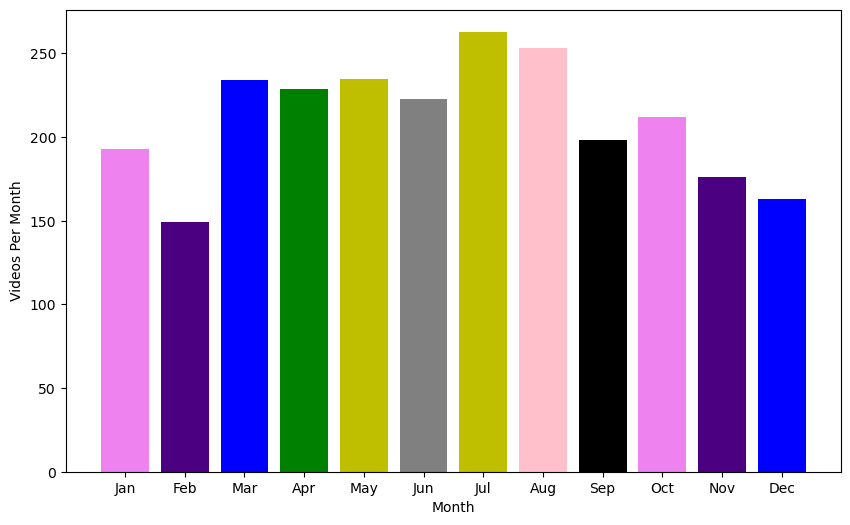

In [34]:
plt.figure(figsize=(10,6))
plt.bar(videos_per_month['Month'],videos_per_month['size'],color=['violet','indigo','b','g','y','grey','y','pink','black'])
plt.xlabel("Month")
plt.ylabel("Videos Per Month")
plt.show()

### Convert DataFrame to csv

In [35]:
video_data.to_csv('C:/Users/Pravin Kumar Pathak/Desktop/Projectds/Video_Details(Neso Academy).csv')